In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import make_classification

In [4]:
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=12)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [11]:
X.shape

(2000, 20)

In [12]:
y.shape


(2000,)

In [13]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc :{}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF train roc-auc :{}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc :1.0
RF train roc-auc :0.9852197307422932


In [21]:
ytrain_pred

array([[0.02, 0.98],
       [0.98, 0.02],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.13, 0.87],
       [0.01, 0.99]])

In [22]:
ytest_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.73, 0.27],
       ...,
       [0.1 , 0.9 ],
       [0.03, 0.97],
       [0.09, 0.91]])

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train,y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('RF train roc-auc :{}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF train roc-auc :{}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc :0.9849493446340832
RF train roc-auc :0.9852197307422932


###  Adaboost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('RF train roc-auc :{}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF train roc-auc :{}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc :0.9981076959820689
RF train roc-auc :0.9852197307422932


###  KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('RF train roc-auc :{}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF train roc-auc :{}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train roc-auc :0.9789621518783209
RF train roc-auc :0.9852197307422932


In [33]:
pred = []
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc:{}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc:0.9892941712710253


In [34]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.00,0.000047,0.452008,0.0
1,0.00,0.000045,0.440058,0.0
2,0.27,0.371142,0.499770,0.6
3,0.06,0.039955,0.422158,0.4
4,0.02,0.021975,0.456313,0.2
...,...,...,...,...
595,1.00,0.970817,0.525300,1.0
596,0.98,0.981652,0.606739,1.0
597,0.90,0.994824,0.668631,1.0
598,0.97,0.872410,0.516130,0.8


In [42]:
pd.concat(pred,axis=1).mean(axis=1)

0      0.113014
1      0.110026
2      0.435228
3      0.230528
4      0.174572
         ...   
595    0.874029
596    0.892098
597    0.890864
598    0.789635
599    0.666229
Length: 600, dtype: float64

In [35]:
final_prediction

0      0.113014
1      0.110026
2      0.435228
3      0.230528
4      0.174572
         ...   
595    0.874029
596    0.892098
597    0.890864
598    0.789635
599    0.666229
Length: 600, dtype: float64

In [37]:
fpr,tpr,thresholds = roc_curve(y_test,final_prediction)
thresholds

array([1.92081485, 0.92081485, 0.87024305, 0.87005831, 0.81625942,
       0.81507556, 0.77343523, 0.77269416, 0.76115945, 0.7609079 ,
       0.67790211, 0.67524705, 0.66992841, 0.66955694, 0.59115754,
       0.56791523, 0.53564253, 0.5275941 , 0.51677018, 0.50127369,
       0.47708868, 0.47024904, 0.45651048, 0.38951096, 0.37984291,
       0.32901566, 0.32544492, 0.10991147, 0.10986146, 0.09421035])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
22,0.456510,0.973333
21,0.470249,0.973333
20,0.477089,0.971667
23,0.389511,0.970000
19,0.501274,0.970000
18,0.516770,0.970000
17,0.527594,0.970000
15,0.567915,0.968333
14,0.591158,0.968333
24,0.379843,0.968333


In [40]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

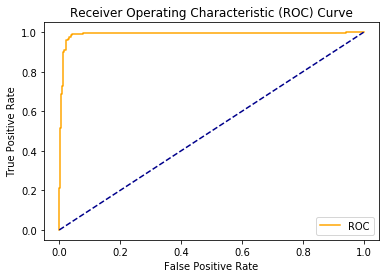

In [41]:
plot_roc_curve(fpr,tpr)